In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from datasets import load_dataset
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skill: ast.literal_eval(skill) if pd.notna(skill) else skill)

In [3]:
df_US = df[df['job_country'] == 'United States'].dropna(subset=['salary_year_avg']).copy()

In [ ]:
job_titles = df_US['job_title_short'].value_counts().index[:6].tolist()

In [5]:
df_US_top6 = df_US[df_US['job_title_short'].isin(job_titles)]

In [13]:
job_order = df_US_top6.groupby(by='job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index.to_list()

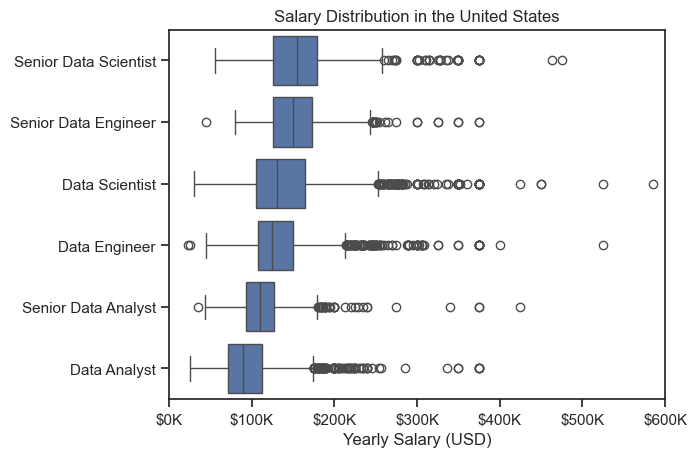

In [14]:
sns.boxplot(data=df_US_top6, x='salary_year_avg', y='job_title_short', order=job_order)
sns.set_theme(style='ticks')

plt.title('Salary Distribution in the United States')
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('')
plt.xlim(0, 600000)
from matplotlib.ticker import FuncFormatter
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
plt.show()


### Investigate Median Salary Vs Skill for Data Analysts

In [ ]:
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].dropna(subset=['salary_year_avg']).copy()
df_DA_US = df_DA_US.explode('job_skills')

In [20]:
df_DA_US_top_pay = df_DA_US.groupby(by='job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='median', ascending=False)
df_DA_US_top_pay = df_DA_US_top_pay.head(10)

In [23]:
df_DA_US_skills = df_DA_US.groupby(by='job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)
df_DA_US_skills = df_DA_US_skills.head(10).sort_values(by='median', ascending=False)
df_DA_US_skills

,count,median
job_skills,,
python,1431,97500.00
tableau,1364,92875.00
r,893,92500.00
sql server,286,92500.00
sql,2508,91000.00
sas,926,90000.00
power bi,838,90000.00
powerpoint,462,85000.00
excel,1808,84392.00


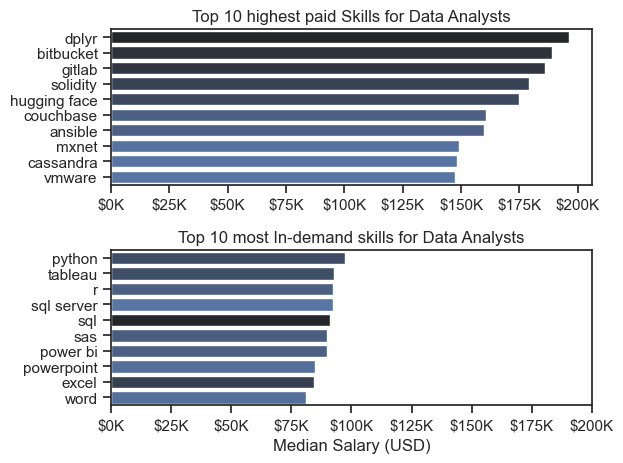

In [27]:
fig,ax = plt.subplots(2, 1)

sns.set_theme(style='ticks')

sns.barplot(data=df_DA_US_top_pay, x='median', y=df_DA_US_top_pay.index, hue='median', ax=ax[0], palette='dark:b_r')
ax[0].legend().remove()

ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].set_title('Top 10 highest paid Skills for Data Analysts')
ax[0].xaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))


sns.barplot(data=df_DA_US_skills, x='median', y=df_DA_US_skills.index, hue='count', ax=ax[1], palette='dark:b_r')
ax[1].legend().remove()

ax[1].set_xlabel('Median Salary (USD)')
ax[1].set_ylabel('')
ax[1].set_xlim(0, 200000)
ax[1].set_title('Top 10 most In-demand skills for Data Analysts')
ax[1].xaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

plt.tight_layout()
plt.show()
